Loading Data


In [40]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score

# import Data
df = pd.read_csv('tested.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [42]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [43]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


Data Preprocessing

In [44]:
#Analyzing on how many people have survived
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

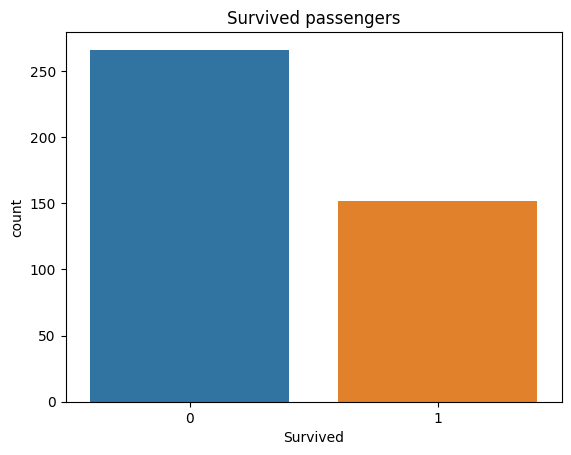

In [45]:
sns.countplot(x = 'Survived', data = df).set_title('Survived passengers')
plt.show()

In [46]:
df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

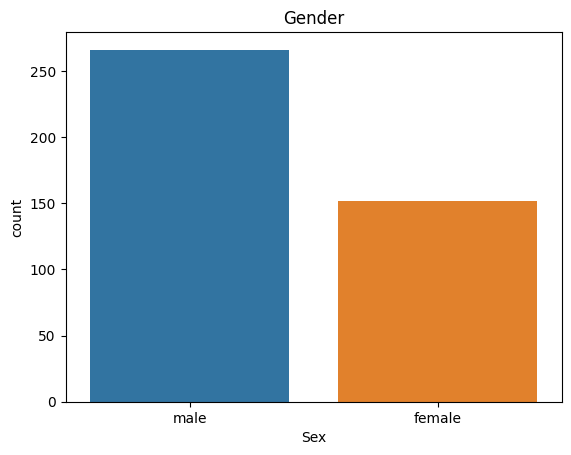

In [47]:
sns.countplot(x = 'Sex', data = df).set_title('Gender')
plt.show()

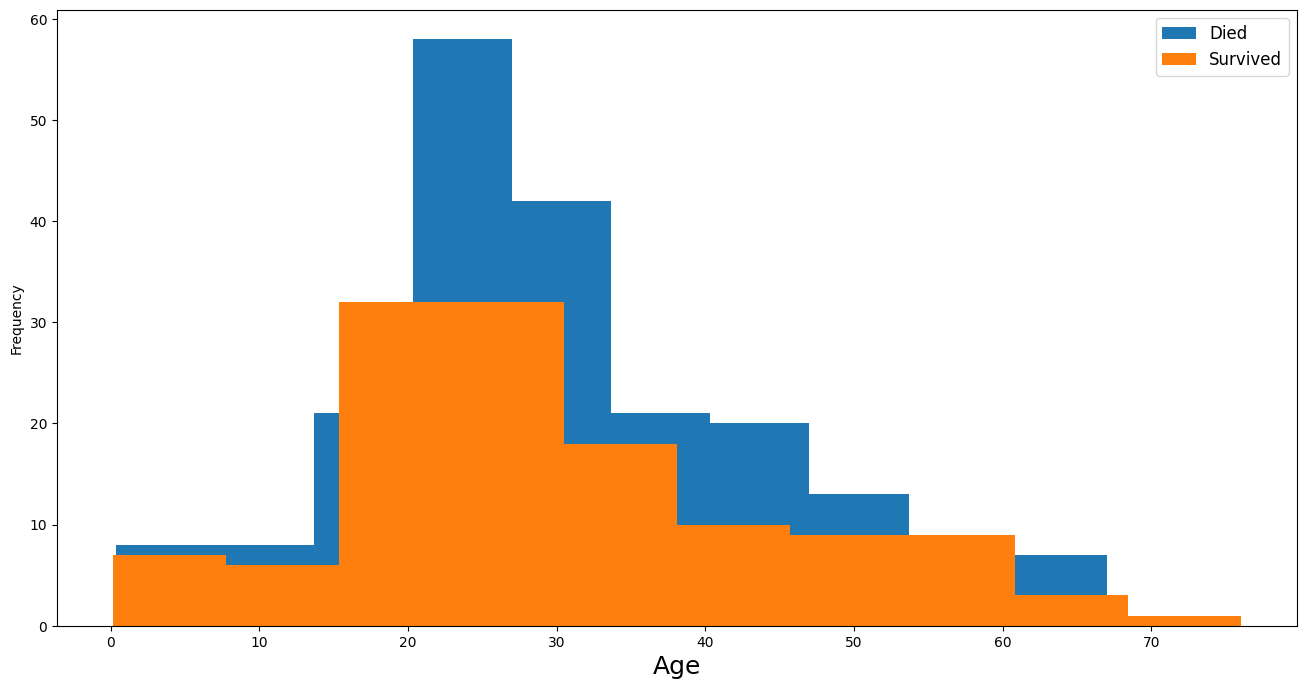

In [48]:
from matplotlib import pyplot as plt 

plt.figure(figsize=(16, 8))
fig = df.groupby('Survived')['Age'].plot.hist(histtype= 'bar')
plt.legend(('Died','Survived'), fontsize = 12)
plt.xlabel('Age', fontsize = 18)
plt.show()




Text(0.5, 1.0, 'Number of Passengers in different class.')

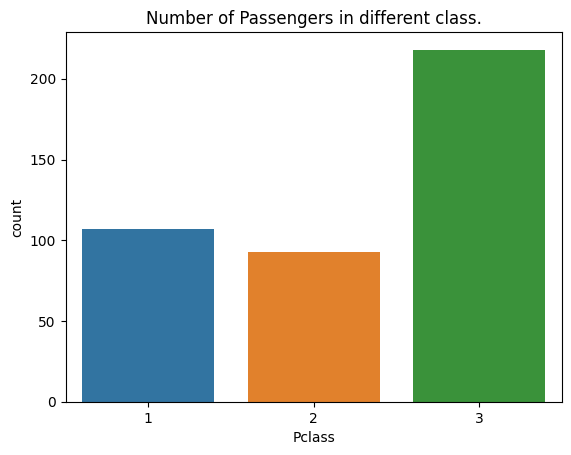

In [49]:
sns.countplot(x = 'Pclass', data = df).set_title(
    'Number of Passengers in different class.')

Text(0.5, 1.0, 'Number of Passengers in different class of both Male and Female')

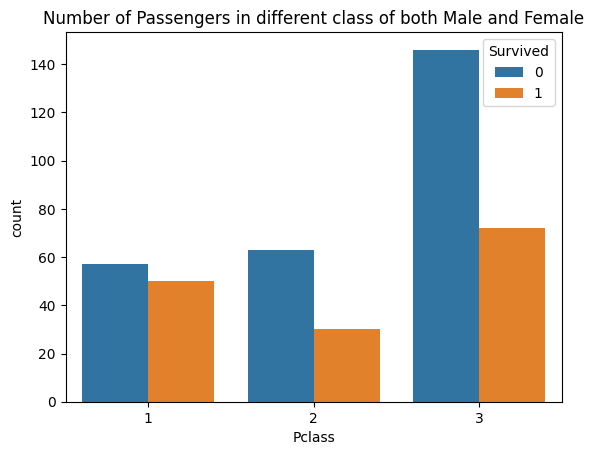

In [50]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = df).set_title(
    'Number of Passengers in different class of both Male and Female')

In [51]:
# Turn categorical variables into quantitative variables 
from sklearn.preprocessing import LabelEncoder

# LabelEncoder object
label_encoder_Sex = LabelEncoder()
label_encoder_Embarked = LabelEncoder()
# Apply label encoding
df['Sex'] = label_encoder_Sex.fit_transform(df['Sex'])
df['Embarked'] = label_encoder_Embarked.fit_transform(df['Embarked'])


print("Mapping:")
for label, encoded_label in zip(label_encoder_Sex.classes_, label_encoder_Sex.transform(label_encoder_Sex.classes_)):
    print(f"{label} is encoded as {encoded_label}")


Mapping:
female is encoded as 0
male is encoded as 1


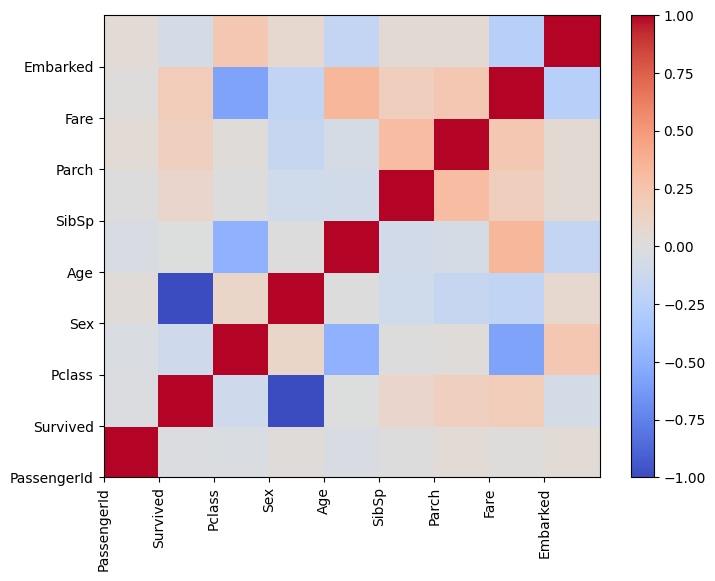

In [52]:
test_data = df[['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
plt.figure(figsize=(8, 6))
plt.pcolor(test_data.corr() , cmap='coolwarm')
plt.colorbar()
# the ticks and labels for both x and y axes
plt.xticks(range(len(test_data.columns)), test_data.columns, rotation='vertical')
plt.yticks(range(len(test_data.columns)), test_data.columns)
plt.show()

In [53]:
test_data.corr(method='pearson')['Age'].abs()

PassengerId    0.034102
Survived       0.000013
Pclass         0.492143
Sex            0.000013
Age            1.000000
SibSp          0.091587
Parch          0.061249
Fare           0.337932
Embarked       0.175848
Name: Age, dtype: float64

In [54]:
test_data.corr(method='pearson')['Survived'].abs()

PassengerId    0.023245
Survived       1.000000
Pclass         0.108615
Sex            1.000000
Age            0.000013
SibSp          0.099943
Parch          0.159120
Fare           0.191514
Embarked       0.076281
Name: Survived, dtype: float64

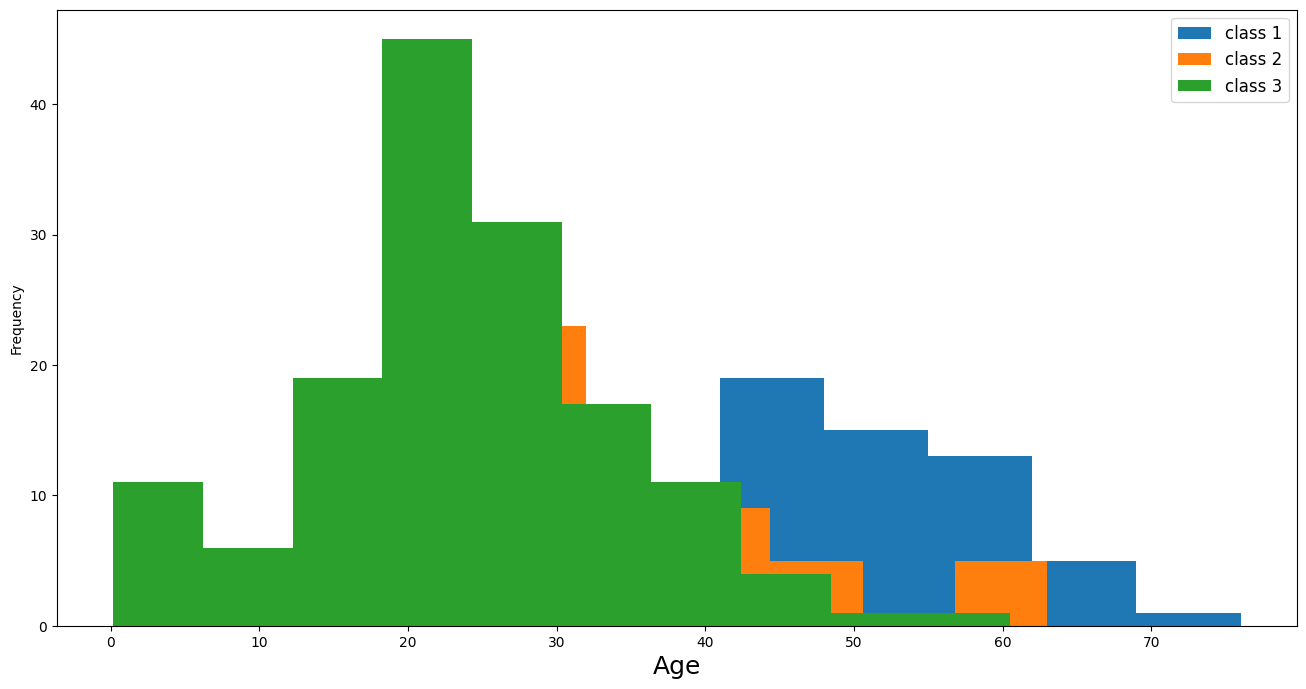

In [55]:

plt.figure(figsize=(16, 8))
fig = df.groupby('Pclass')['Age'].plot.hist(histtype= 'bar')
plt.legend(('class 1','class 2','class 3'), fontsize = 12)
plt.xlabel('Age', fontsize = 18)
plt.show()


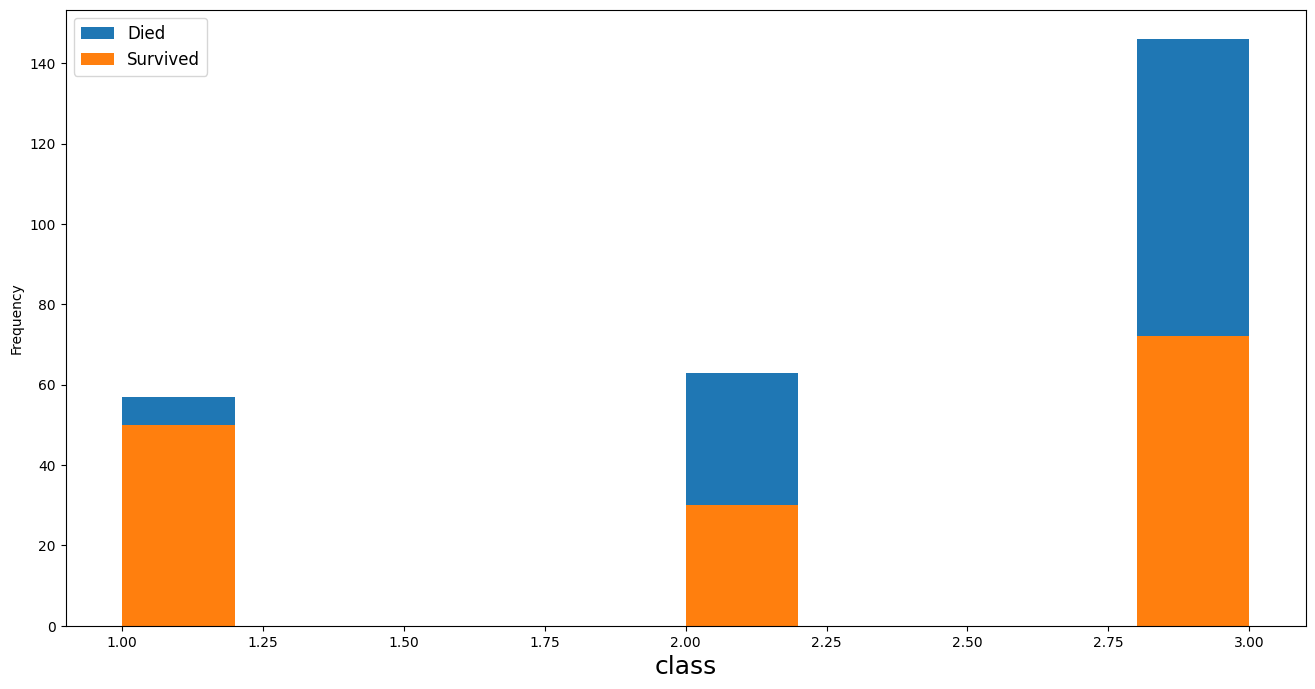

In [56]:
plt.figure(figsize=(16, 8))
fig = df.groupby('Survived')['Pclass'].plot.hist(histtype= 'bar')
plt.legend(('Died','Survived'), fontsize = 12)
plt.xlabel('class', fontsize = 18)
plt.show()

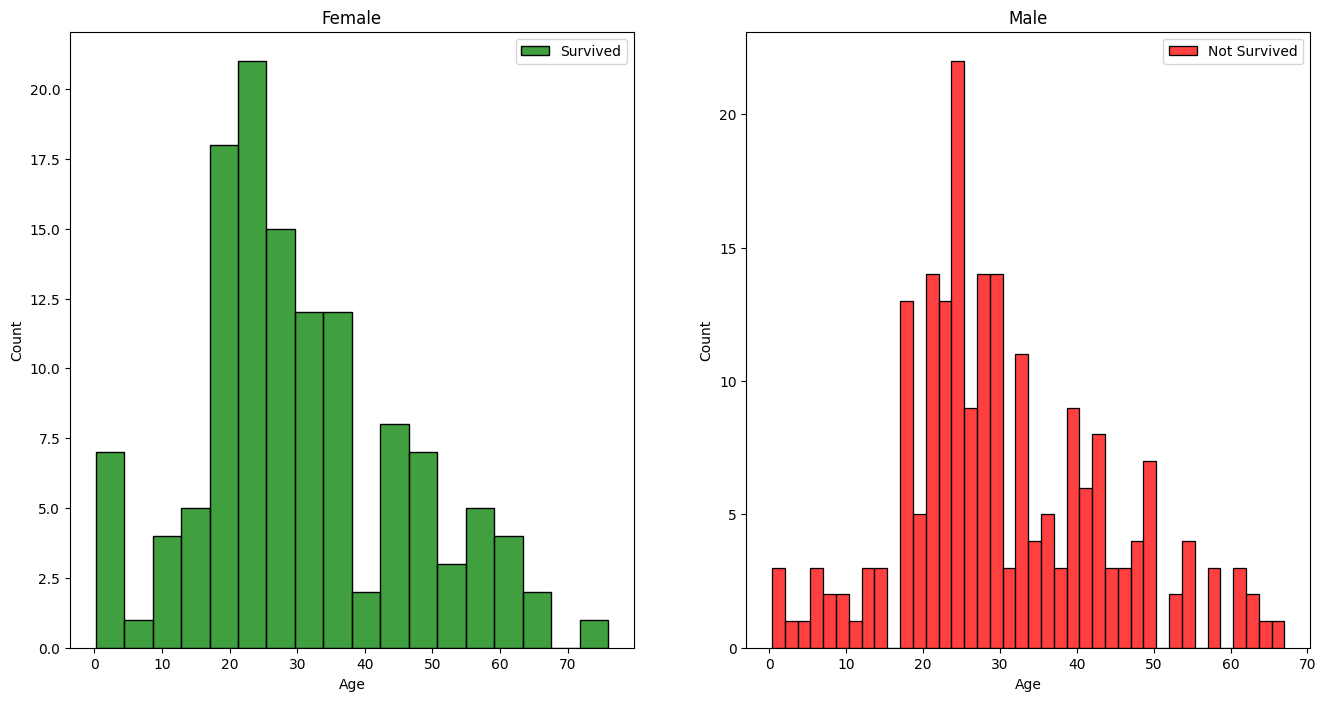

In [57]:
survived = 'Survived'
not_survived = 'Not Survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Filter the 'women' and 'men' DataFrames
women = df[df['Sex'] == 0]
men = df[df['Sex'] == 1]

# The age distribution for women
ax = sns.histplot(women[women['Survived'] == 1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False, color="green")
ax = sns.histplot(women[women['Survived'] == 0].Age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False, color="red")
ax.legend()
ax.set_title('Female')

# The age distribution for men
ax = sns.histplot(men[men['Survived'] == 1].Age.dropna(), bins=18, label=survived, ax=axes[1], kde=False, color="green")
ax = sns.histplot(men[men['Survived'] == 0].Age.dropna(), bins=40, label=not_survived, ax=axes[1], kde=False, color="red")
ax.legend()
ax.set_title('Male')

plt.show()


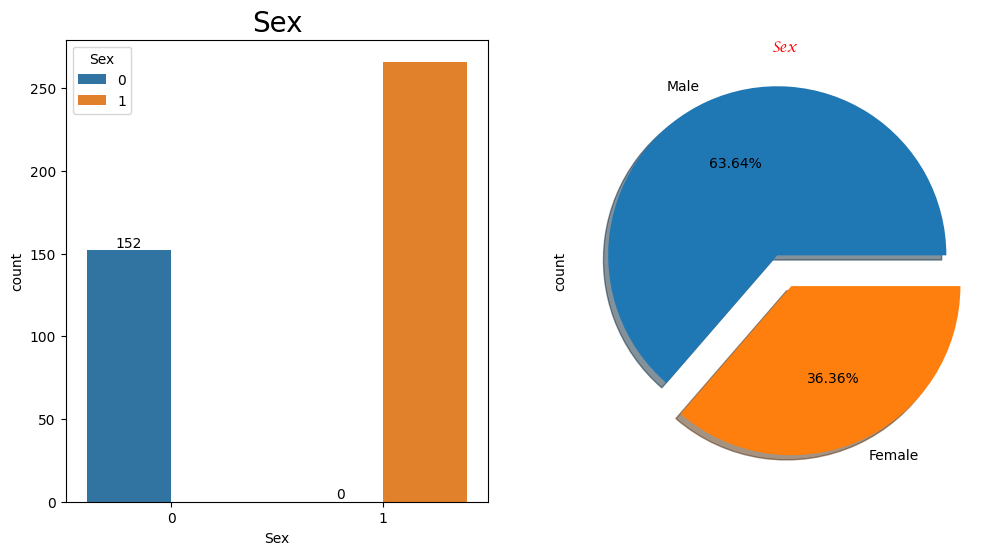

In [58]:
plt.figure(figsize=(12, 6))

ax = plt.subplot(1, 2, 1)
ax = sns.countplot(x='Sex', data=df, hue='Sex')
ax.bar_label(ax.containers[0])
plt.title("Sex", fontsize=20)

ax = plt.subplot(1, 2, 2)
ax = df['Sex'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True, labels=['Male', 'Female'])
ax.set_title(label="Sex", fontsize=20, color='Red', font='Lucida Calligraphy')

plt.show()


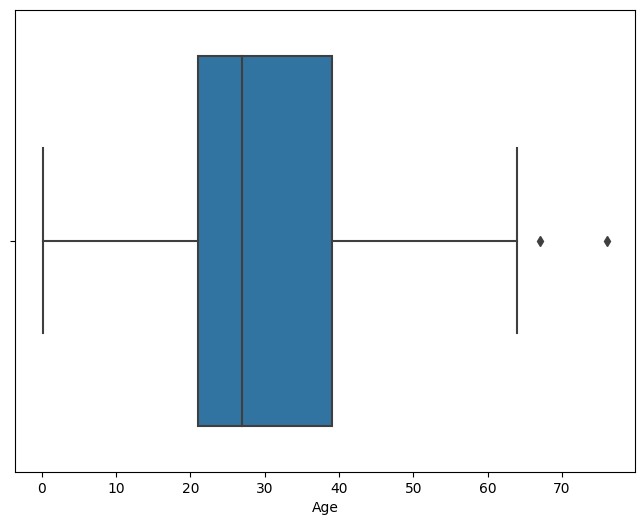

In [59]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x = df["Age"])
plt.show()

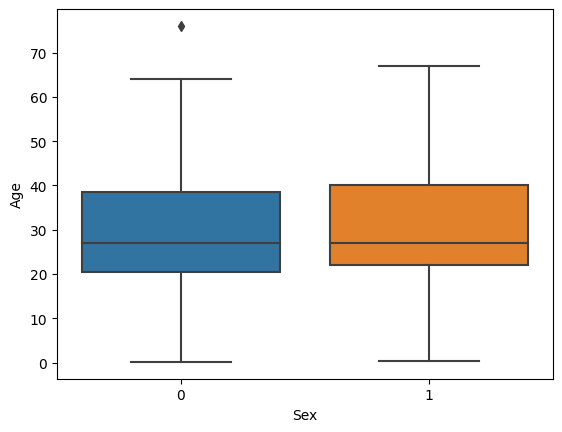

In [60]:
sns.boxplot(x='Sex', y = 'Age',data= df)
plt.show()

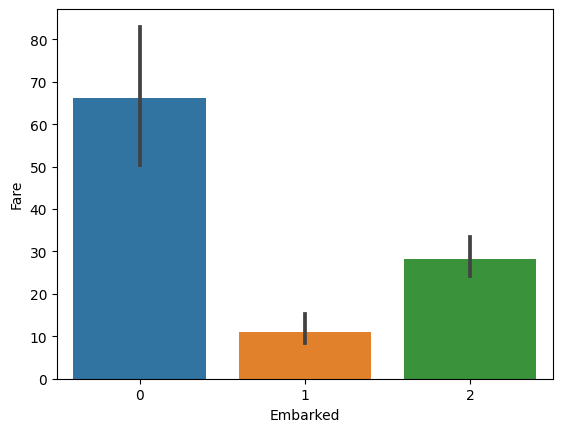

In [61]:
sns.barplot(y='Fare',x='Embarked',data=df)
plt.show()

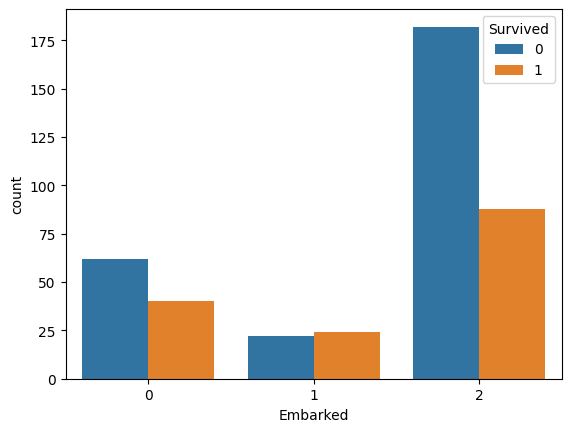

In [62]:
sns.countplot(data = df, x= 'Embarked', hue='Survived')
plt.show()

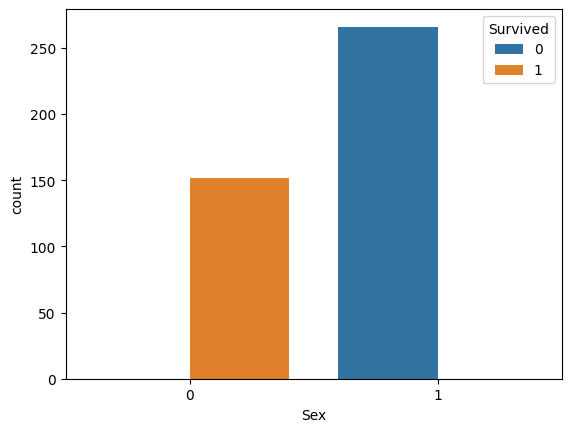

In [63]:
sns.countplot(data = df, x= 'Sex', hue='Survived' )
plt.show()

Data cleaning

In [64]:
#IDENTIFYING THE MISSING VALUES
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values
missing(df)

,Missing_Number,Missing_Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [65]:
# Filled the missing value in Age columns with mean Value in the specific class
class_mean_age = df.groupby('Pclass')['Age'].mean()
df['Age'] = df.apply(lambda x: round(class_mean_age[x['Pclass']], 0) if pd.isna(x['Age']) else x['Age'], axis=1)


# Filled the missing value in Fare columns with mean Value
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

# Drop the columns 
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

missing(df)


,Missing_Number,Missing_Percent
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0


In [66]:
#Data Analysis of the Titanic
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,0.636364,29.407895,0.447368,0.392344,35.627188,1.401914
std,0.481622,0.841838,0.481622,12.968366,0.896760,0.981429,55.840500,0.854496
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,25.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,36.375000,1.000000,0.000000,31.500000,2.000000
max,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [67]:
# Splitting Independent and Dependent Variable
Y = df['Survived']
X = df.drop(['Survived'] , axis=1)

Build model

In [68]:
# Splitting train and test set

from sklearn.model_selection import train_test_split

X_train , X_test ,y_train ,  y_test = train_test_split(X,Y,test_size=.3,random_state= 21)

In [69]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,1,0,64.00,0,2,83.1583,0
201,3,1,0.33,0,2,14.4000,2
336,2,1,32.00,0,0,13.0000,2
187,3,1,17.00,2,0,8.0500,2
214,3,0,38.00,4,2,7.7750,2
...,...,...,...,...,...,...,...
368,1,0,45.00,0,1,59.4000,0
48,1,0,60.00,0,0,76.2917,0
260,3,1,36.50,1,0,17.4000,2
312,3,1,24.00,0,0,7.5750,2


In [70]:

Lr = LogisticRegression()
Lr.fit(X_train,y_train)
y_pred = Lr.predict(X_test)

In [71]:
print("Training set score: {:.2f}".format(Lr.score(X_train, y_train)),'\n')
print("Test set score: {:.2f}".format(Lr.score(X_test, y_test)),'\n')
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred)),'\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred),'\n')
print("Classification_Report: \n",classification_report(y_test,y_pred))

Training set score: 1.00 

Test set score: 1.00 

Accuracy Score: 1.00 

Confusion Matrix: 
 [[76  0]
 [ 0 50]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [72]:
#Random Forest

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

print('Random Forest Classifier Model Performance: ')
print('Mean squared error: ',precision_score(y_test, y_pred))
print('Mean absolute error: ',recall_score(y_test, y_pred))
print('R2 score: ' , f1_score(y_test, y_pred))
print('Confusin matrix: ' ,confusion_matrix(y_test, y_pred))


Random Forest Classifier Model Performance: 
Mean squared error:  1.0
Mean absolute error:  1.0
R2 score:  1.0
Confusin matrix:  [[76  0]
 [ 0 50]]
